In [2]:
library("openxlsx")
library("ggplot2")
library("dplyr")

In [3]:
df <- read.xlsx(
  xlsxFile = "econ.xlsx", sheet = 1,
  cols = c(1, 4, 6), detectDates = TRUE
)

In [4]:
df_filtered <- df %>% filter(tempo >= "1996-01-01")
df_filtered

tempo,tpp,ndesemp
<date>,<dbl>,<dbl>
1996-01-01,6.7,7491
1996-02-01,6.7,7313
1996-03-01,6.6,7318
1996-04-01,5.7,7415
1996-05-01,6.7,7423
1996-06-01,7.1,7095
1996-07-01,6.7,7337
1996-08-01,6.6,6882
1996-09-01,6.7,6979


In [5]:
# Function that normalizes all the variables of the vector
normalize_vector <- function(vector) {
    len <- length(vector)
    mean <- mean(vector)
    standard_deviation <- sd(vector)
    for (i in 1:len) {
        vector[i] = (vector[i] - mean) / standard_deviation
    }
    return(vector)
}

In [6]:
df_filtered$tpp <- normalize_vector(df_filtered$tpp)
df_filtered$ndesemp <- normalize_vector(df_filtered$ndesemp)
df_filtered

tempo,tpp,ndesemp
<date>,<dbl>,<dbl>
1996-01-01,0.61452063,-0.5190158
1996-02-01,0.61452063,-0.5808502
1996-03-01,0.54730291,-0.5791133
1996-04-01,-0.05765658,-0.5454170
1996-05-01,0.61452063,-0.5426379
1996-06-01,0.88339151,-0.6565799
1996-07-01,0.61452063,-0.5725130
1996-08-01,0.54730291,-0.7305727
1996-09-01,0.61452063,-0.6968765


`geom_smooth()` using formula = 'y ~ x'


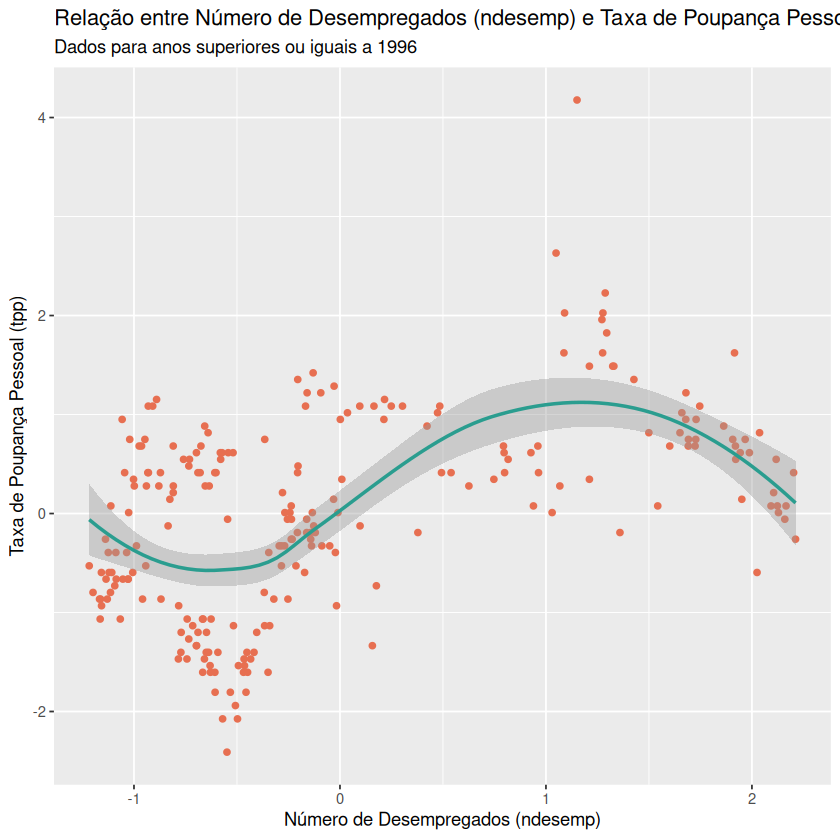

In [7]:
df_filtered %>%
  ggplot(aes(x = ndesemp, y = tpp)) +
  geom_point(colour = "#e76f51") +
  stat_smooth(method = loess, color = "#2a9d8f") +
  ggtitle("Relação entre Número de Desempregados (ndesemp) e Taxa de Poupança Pessoal (tpp)") +
  labs(subtitle = "Dados para anos superiores ou iguais a 1996") +
  xlab("Número de Desempregados (ndesemp)") +
  ylab("Taxa de Poupança Pessoal (tpp)")

In [8]:
ggsave("ex01.png", width = 20, height = 14.5, units = "cm")

`geom_smooth()` using formula = 'y ~ x'
